In [2]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations
from matplotlib_venn import venn2, venn3

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))


c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
phase2_collection = unpickle_this('phase2collection.pkl')
phase2_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, timebin = 100, ignore_freq = 0.5, smoothing_window=None)

All set to analyze


In [11]:
total_neurons = 0
total_good_neurons = 0
for recording in phase2_collection.collection.values(): 
    total_neurons += len(recording.freq_dict.keys())
    for neuron, freq in recording.freq_dict.items():
        if freq > 0.5:
            total_good_neurons += 1
        else:
            pass    
print(total_good_neurons, total_neurons)   
      
      

215 241


# Parameter EDA

In [4]:
#NEEDS TO BE REDONE WITH SMOOTHING WINDOW UPDATES
            #offset included                     offset excluded
# 3, 5, -2 =      76                                   84
# 1 , 5, -2 =     84                                   76
# 2, 5, -2 =      82                                   80                               
# 2, 4, 0 =       82                                   
# 3, 4 , -1 =     65                                   73
# 2, 4, -1 =      71                                   82
# 3, 4, 0 =       74
# 3, 3, 0 =       70
# 2, 3, 0 =       69
# 2, 4, 1 =       69

In [5]:
equalize = 3
baseline_window = 1
offset = 0
print(phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None))
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition',equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None)

Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
(1.7295321637426901, 0.10540372912942991, [[26, 171], [16, 182]])
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples


(0.8035714285714286, 0.5980331534709321, [[15, 182], [20, 195]])

In [6]:
equalize = 3
baseline_window = 1
offset = 0
print(phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None))
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition',equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None)


Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
(1.7295321637426901, 0.10540372912942991, [[26, 171], [16, 182]])
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples


(0.8035714285714286, 0.5980331534709321, [[15, 182], [20, 195]])

# Grouping cells for pie chart

needs to be checked to see whether if a neuron has one Nan (since wilcoxon update from tyler does compute P value for copmarisons with less than 6 of an event type), whether that neuron is thrown out completely or is listed as insignificant for the Nan comparisons if it can be computed for some of the comparisons. 

also you need to think about which way makes more sense to do

In [7]:
for event in ['cagemate', 'novel', 'recall']:
    phase2_analysis.wilcox_baseline_v_event_collection(event, equalize, baseline_window, offset, save = True, plot = False)
    results = phase2_analysis.wilcox_event_v_event_collection(event, 'iti_events', equalize, pre_window = baseline_window, plot=False, save = True)

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples


In [8]:
phase2_collection.wilcox_dfs
df_list = []
for comparison in ['3s novel vs 1s baseline', '3s cagemate vs 1s baseline', '3s recall vs 1s baseline']:
    df = phase2_collection.wilcox_dfs[comparison]
    df_list.append(df)

is_first = True 
for df in df_list:
    i = 1
    if is_first:
        presniff_master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        temp_df.columns = [f'Subject', 'Recording', 'original unit id', 
                            'Event {i}', 'event{i} vs event2']
        presniff_master_df = presniff_master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
        i +=1
presniff_master_df 

,Subject,Recording,original unit id,Event,event1 vs event2,Event {i}_x,event{i} vs event2_x,Event {i}_y,event{i} vs event2_y
0,1.1,20230803_101331_1_merged.rec,0,3s novel vs 1s baseline,NaN,NaN,NaN,3s recall vs 1s baseline,NaN
1,1.4,20230803_121318_1_merged.rec,26,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant
2,1.4,20230803_121318_1_merged.rec,92,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant
3,1.4,20230803_121318_1_merged.rec,7,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant
4,1.4,20230803_121318_1_merged.rec,100,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,decreases
...,...,...,...,...,...,...,...,...,...
193,1.4,20230818_133620_1_merged.rec,101,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant
194,1.4,20230818_133620_1_merged.rec,50,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant
195,1.4,20230818_133620_1_merged.rec,74,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant
196,1.4,20230818_133620_1_merged.rec,107,3s novel vs 1s baseline,not significant,3s cagemate vs 1s baseline,not significant,3s recall vs 1s baseline,not significant


In [9]:
presniff_master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'novel vs baseline',
 'Event_y',
 'cagemate vs baseline',
 'Event_x',
 'familiar vs baseline']
presniff_master_df = presniff_master_df[['original unit id',
 'novel vs baseline',
 'cagemate vs baseline',
 'familiar vs baseline']]
presniff_master_df

,original unit id,novel vs baseline,cagemate vs baseline,familiar vs baseline
0,0,NaN,NaN,NaN
1,26,not significant,not significant,not significant
2,92,not significant,not significant,not significant
3,7,not significant,not significant,not significant
4,100,not significant,not significant,decreases
...,...,...,...,...
193,101,not significant,not significant,not significant
194,50,not significant,not significant,not significant
195,74,not significant,not significant,not significant
196,107,not significant,not significant,not significant


In [10]:
def group_cells(novel, cagemate, fam, acquisition=None):
    group = ''
    if (novel == 'increases') or (novel == 'decreases'):
        group = 'novel'
    if (cagemate == 'increases') or (cagemate == 'decreases'):
        group = group + 'cagemate' 
    if (fam == 'increases') or (fam == 'decreases'):
        group = group + 'fam'
    if acquisition is not None:
        if (acquisition == 'increases') or (acquisition == 'decreases'):
            group = group + 'acquisition'
    return group

presniff_master_df['cell group'] = presniff_master_df.apply(lambda row: group_cells(row['novel vs baseline'],
                                                                  row['cagemate vs baseline'],
                                                                  row['familiar vs baseline']), axis = 1)
results = presniff_master_df.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_21492\1799057836.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presniff_master_df['cell group'] = presniff_master_df.apply(lambda row: group_cells(row['novel vs baseline'],


,original unit id,novel vs baseline,cagemate vs baseline,familiar vs baseline
cell group,,,,
,149,148,134,148
cagemate,11,11,11,11
cagematefam,2,2,2,2
fam,10,10,9,10
novel,21,21,19,21
novelcagemate,2,2,2,2
novelfam,3,3,3,3


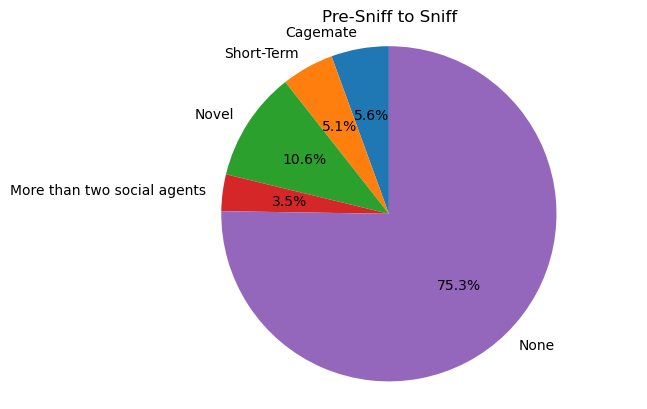

In [11]:
def plot_pie_chart(labels, sizes, title):
    """
    Plot a pie chart.

    Parameters:
    labels (list of str): Labels for each slice of the pie.
    sizes (list of float): Sizes of each slice (should sum to 100%).
    title (str): Title for the pie chart.
    """
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)
    plt.show()

# Example usage:
plot_pie_chart(['Cagemate', 'Short-Term', 'Novel', 'More than two social agents', 'None'], 
               [11, 10, 21, 7, 149], 'Pre-Sniff to Sniff')

In [12]:
phase2_collection.wilcox_dfs
df_list = []
for comparison in ['novel vs iti_events (3s)', 'cagemate vs iti_events (3s)', 'recall vs iti_events (3s)']:
    df = phase2_collection.wilcox_dfs[comparison]
    df_list.append(df)

is_first = True 
for df in df_list:
    i = 1
    if is_first:
        iti_master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        temp_df.columns = [f'Subject', 'Recording', 'original unit id', 
                            'Event {i}', 'event{i} vs event2']
        iti_master_df = iti_master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
        i +=1
iti_master_df 

,Subject,Recording,original unit id,Event,event1 vs event2,Event {i}_x,event{i} vs event2_x,Event {i}_y,event{i} vs event2_y
0,1.1,20230803_101331_1_merged.rec,196,novel vs iti_events (3s),decreases,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant
1,1.1,20230803_101331_1_merged.rec,91,novel vs iti_events (3s),not significant,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant
2,1.1,20230803_101331_1_merged.rec,267,novel vs iti_events (3s),decreases,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant
3,1.1,20230803_101331_1_merged.rec,136,novel vs iti_events (3s),not significant,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant
4,1.1,20230803_101331_1_merged.rec,79,novel vs iti_events (3s),not significant,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant
...,...,...,...,...,...,...,...,...,...
210,1.4,20230818_133620_1_merged.rec,101,novel vs iti_events (3s),not significant,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant
211,1.4,20230818_133620_1_merged.rec,50,novel vs iti_events (3s),increases,cagemate vs iti_events (3s),increases,recall vs iti_events (3s),increases
212,1.4,20230818_133620_1_merged.rec,74,novel vs iti_events (3s),decreases,cagemate vs iti_events (3s),decreases,recall vs iti_events (3s),not significant
213,1.4,20230818_133620_1_merged.rec,107,novel vs iti_events (3s),not significant,cagemate vs iti_events (3s),not significant,recall vs iti_events (3s),not significant


In [13]:
iti_master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'novel vs iti',
 'Event_y',
 'cagemate vs iti',
 'Event_x',
 'familiar vs iti']
iti_master_df = iti_master_df[['original unit id',
 'novel vs iti',
 'cagemate vs iti',
 'familiar vs iti']]
iti_master_df

,original unit id,novel vs iti,cagemate vs iti,familiar vs iti
0,196,decreases,not significant,not significant
1,91,not significant,not significant,not significant
2,267,decreases,not significant,not significant
3,136,not significant,not significant,not significant
4,79,not significant,not significant,not significant
...,...,...,...,...
210,101,not significant,not significant,not significant
211,50,increases,increases,increases
212,74,decreases,decreases,not significant
213,107,not significant,not significant,not significant


In [14]:
def group_cells(novel, cagemate, fam, acquisition=None):
    group = ""
    if (novel == 'increases') or (novel == 'decreases'):
        group = 'novel'
    if (cagemate == 'increases') or (cagemate == 'decreases'):
        group = group + 'cagemate' 
    if (fam == 'increases') or (fam == 'decreases'):
        group = group + 'fam'
    if acquisition is not None:
        if (acquisition == 'increases') or (acquisition == 'decreases'):
            group = group + 'acquisition'
    return group

iti_master_df['cell group iti'] = iti_master_df.apply(lambda row: group_cells(row['novel vs iti'],
                                                                  row['cagemate vs iti'],
                                                                  row['familiar vs iti']), axis = 1)
iti_results = iti_master_df.groupby('cell group iti').count()
iti_results

C:\Users\megha\AppData\Local\Temp\ipykernel_21492\1316706776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iti_master_df['cell group iti'] = iti_master_df.apply(lambda row: group_cells(row['novel vs iti'],


,original unit id,novel vs iti,cagemate vs iti,familiar vs iti
cell group iti,,,,
,109,109,109,109
cagemate,12,12,12,12
cagematefam,10,10,10,10
fam,14,14,14,14
novel,23,23,23,23
novelcagemate,10,10,10,10
novelcagematefam,29,29,29,29
novelfam,8,8,8,8


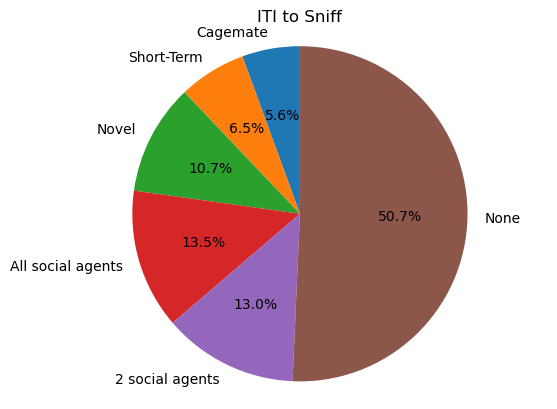

In [15]:
def plot_pie_chart(labels, sizes, title):
    """
    Plot a pie chart.

    Parameters:
    labels (list of str): Labels for each slice of the pie.
    sizes (list of float): Sizes of each slice (should sum to 100%).
    title (str): Title for the pie chart.
    """
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)
    plt.show()

# Example usage:
plot_pie_chart(['Cagemate', 'Short-Term', 'Novel', 'All social agents',
                '2 social agents', 'None'], 
               [12, 14, 23, 29, 28, 109], 'ITI to Sniff')

In [16]:
total_master_df = pd.merge(iti_master_df, presniff_master_df, on='original unit id')
total_master_df = total_master_df[(total_master_df['cell group iti'] != "") | 
                                  (total_master_df['cell group'] != "")]
cagemate_master_df = total_master_df[(total_master_df['cell group iti'] == "cagemate") | 
                                  (total_master_df['cell group'] == "cagemate")]
recall_master_df = total_master_df[(total_master_df['cell group iti'] == "fam") | 
                                  (total_master_df['cell group'] == "fam")]
novel_master_df = total_master_df[(total_master_df['cell group iti'] == "novel") | 
                                  (total_master_df['cell group'] == "novel")]

In [46]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold' 

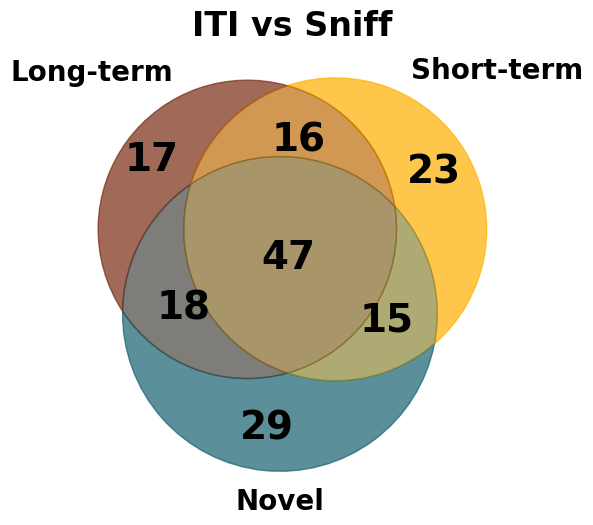

In [55]:
set1 = set(total_master_df.index[total_master_df['cell group iti'].str.contains('cagemate')])
set2 = set(total_master_df.index[total_master_df['cell group iti'].str.contains('fam')])
set3 = set(total_master_df.index[total_master_df['cell group iti'].str.contains('novel')])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Long-term', 'Short-term', 'Novel'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('ITI vs Sniff', fontsize =24)
plt.savefig('phase2_venn_baseline.png', format='png', dpi=600, transparent = True)
plt.show()

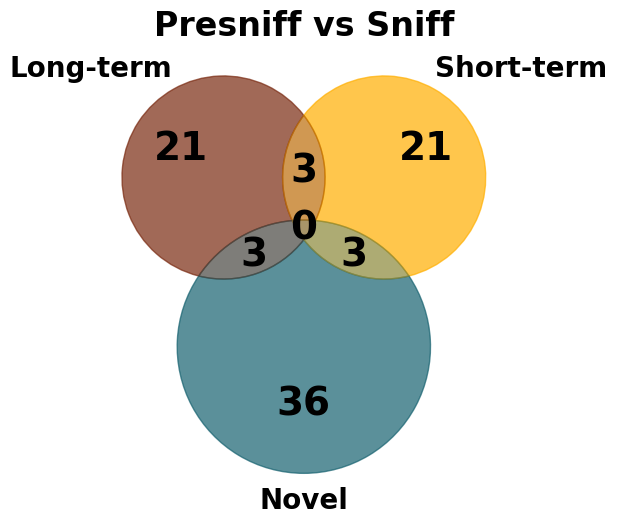

In [56]:
set1 = set(total_master_df.index[total_master_df['cell group'].str.contains('cagemate')])
set2 = set(total_master_df.index[total_master_df['cell group'].str.contains('fam')])
set3 = set(total_master_df.index[total_master_df['cell group'].str.contains('novel')])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([set1, set2, set3], ('Long-term', 'Short-term', 'Novel'))
venn.get_patch_by_id('100').set_color('#792910')  # Only in Set 1
venn.get_patch_by_id('010').set_color('#FFAF00')  # Only in Set 2
venn.get_patch_by_id('001').set_color('#15616F')  # Only in Set 3
venn.get_patch_by_id('110').set_color('#bc6c08')  # In Set 1 and Set 2
venn.get_patch_by_id('101').set_color('#474640')  # In Set 1 and Set 3
venn.get_patch_by_id('011').set_color('#8a8838')  # In Set 2 and Set 3
venn.get_patch_by_id('111').set_color('#84682a')  # In all Sets

# Optionally, set transparency
for subset in ('100', '010', '001', '110', '101', '011', '111'):
    venn.get_patch_by_id(subset).set_alpha(0.7)

for text in venn.set_labels:
    text.set_fontsize(20)  # Set label font size

for text in venn.subset_labels:
    if text:  # Check if the subset label exists
        text.set_fontsize(28) 
# Show the plot
plt.title('Presniff vs Sniff', fontsize = 24)
plt.savefig('phase2_venn_presniff.png', format='png', dpi=600, transparent = True)
plt.show()

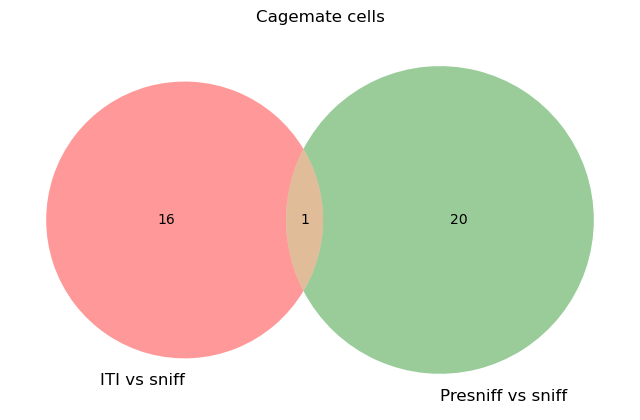

In [ ]:
set1 = set(cagemate_master_df.index[cagemate_master_df['cell group iti'] == 'cagemate'])
set2 = set(cagemate_master_df.index[cagemate_master_df['cell group'] == 'cagemate'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('ITI vs sniff', 'Presniff vs sniff'))

# Show the plot
plt.title('Cagemate cells')
plt.show()

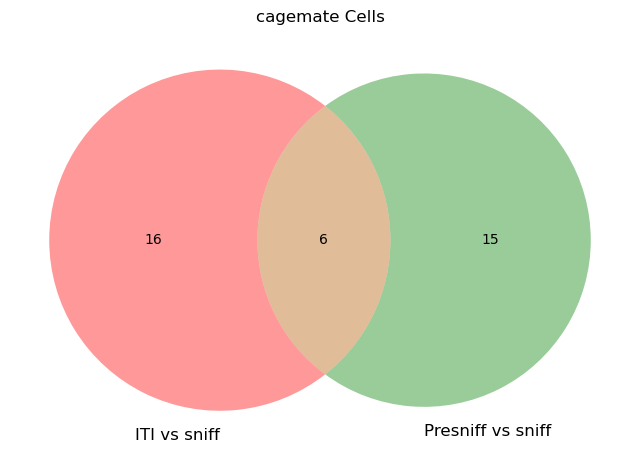

In [ ]:
set1 = set(cagemate_master_df.index[cagemate_master_df['cell group iti'].str.contains('cagemate')])
set2 = set(cagemate_master_df.index[cagemate_master_df['cell group'] == 'cagemate'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('ITI vs sniff', 'Presniff vs sniff'))

# Show the plot
plt.title('cagemate Cells')
plt.show()

{16, 171, 181, 191, 192, 63, 68, 69, 328, 329, 75, 78, 334, 82, 86, 344, 92, 241, 114, 116, 255}


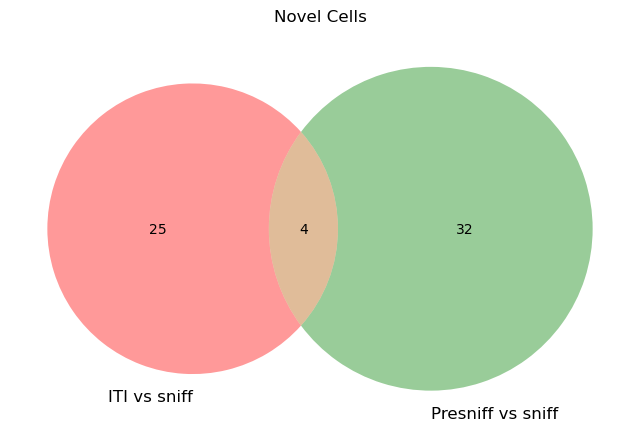

In [ ]:
set1 = set(novel_master_df.index[novel_master_df['cell group iti'] == 'novel'])
set2 = set(novel_master_df.index[novel_master_df['cell group'] == 'novel'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('ITI vs sniff', 'Presniff vs sniff'))

# Show the plot
plt.title('Novel Cells')
plt.show()

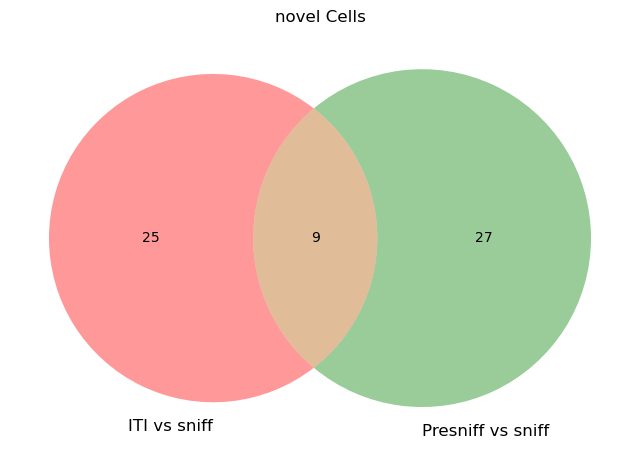

In [ ]:
set1 = set(novel_master_df.index[novel_master_df['cell group iti'].str.contains('novel')])
set2 = set(novel_master_df.index[novel_master_df['cell group'] == 'novel'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('ITI vs sniff', 'Presniff vs sniff'))

# Show the plot
plt.title('novel Cells')
plt.show()

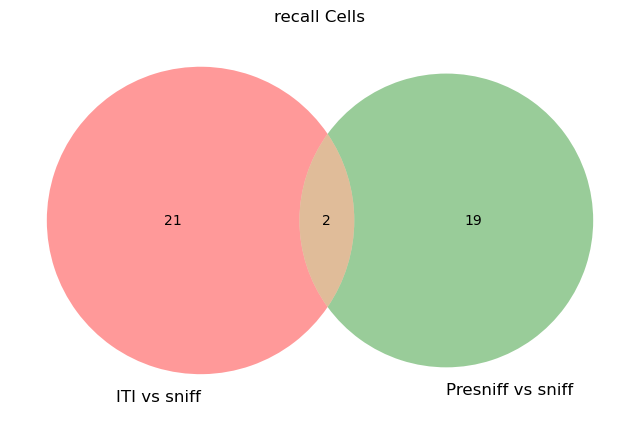

In [ ]:
set1 = set(recall_master_df.index[recall_master_df['cell group iti'] == 'fam'])
set2 = set(recall_master_df.index[recall_master_df['cell group'] == 'fam'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('ITI vs sniff', 'Presniff vs sniff'))

# Show the plot
plt.title('recall Cells')
plt.show()

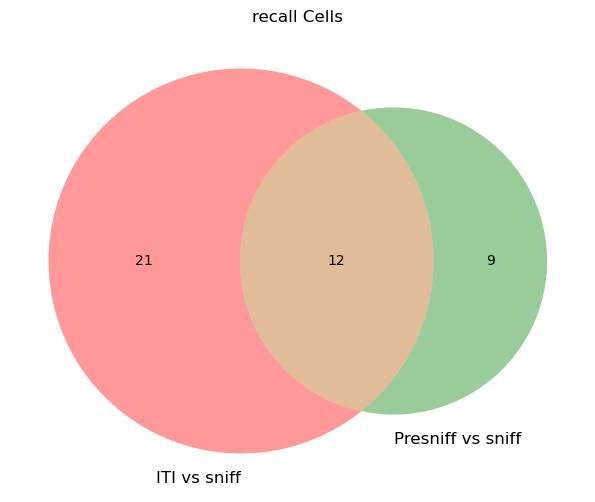

In [ ]:
set1 = set(recall_master_df.index[recall_master_df['cell group iti'].str.contains('fam')])
set2 = set(recall_master_df.index[recall_master_df['cell group'] == 'fam'])

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn2([set1, set2], ('ITI vs sniff', 'Presniff vs sniff'))

# Show the plot
plt.title('recall Cells')
plt.show()

# Plotting

These are old example neurons, new ones will have to be found

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


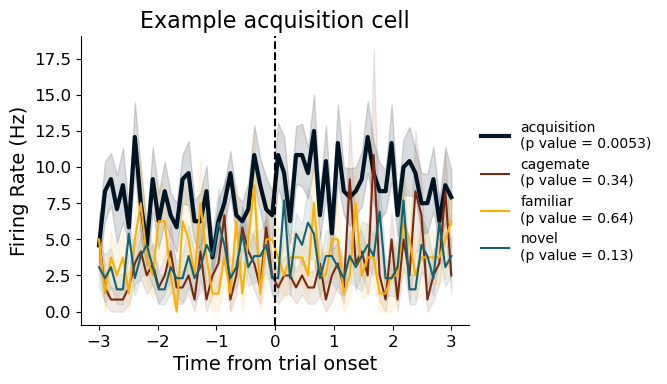

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


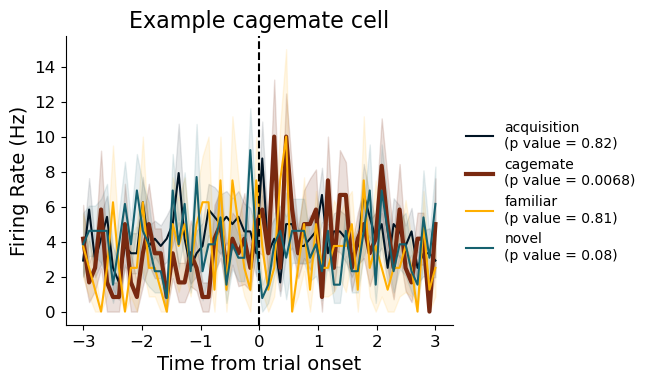

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


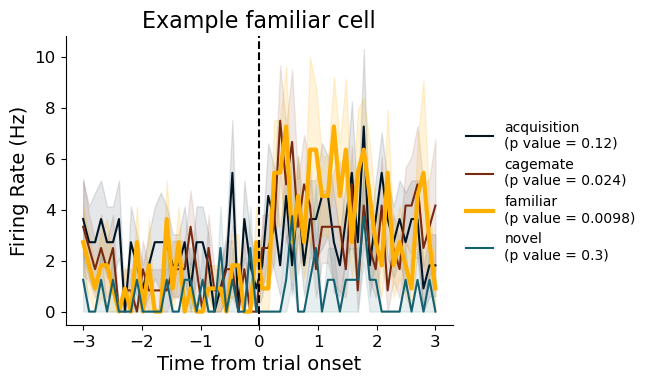

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


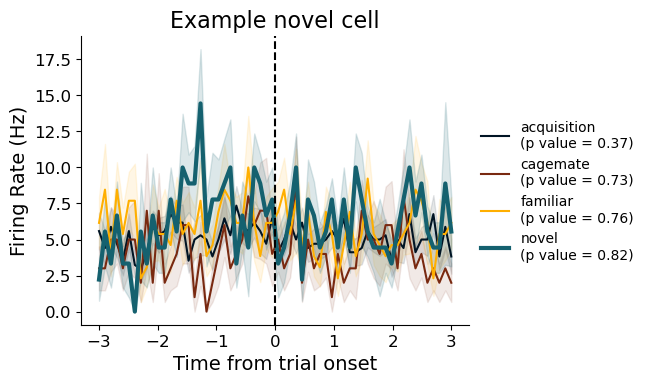

In [ ]:
color_dict = {'cagemate':hex_2_rgb('#792910'), 'novel':hex_2_rgb('#15616F'),
              'recall':hex_2_rgb('#FFAF00'), 'acquisition':hex_2_rgb('#001424') }
def wilcox_baseline_v_event_unit(
    recording_name, unit_id, events,
    equalize, baseline_window, offset, title, highlight, exclude_offset=False,
    
):
    """
    plots event triggered average firing rates for units with significant
    wilcoxon signed rank tests (p value <0.05) for event v baseline window.

    Args(4 total, 4 required):
        events: list of str, event types of which ehpys snippets happen during
        equalize: float, length (s) of events used by padding with post
            event time or trimming events all to equalize (s) long used
        baseline_window: int, default=0, seconds prior to start of event
        offset: int, adjusts end of baseline by offset(s) from onset of
            behavior such that offset=2 adds the first two seconds of event
            data into baseline while offest=-2 removes them from baseline
            averages

    Returns:
        none
    """
    plt.figure(figsize=(5, 3.75))
    recording = phase2_analysis.ephyscollection.get_by_name(recording_name)
    for event in events:
        if event == highlight:
            linewidth = 3
            alpha = .15
        else:
            linewidth = 1.5
            alpha = .1
        temp_master_df = phase2_analysis.wilcox_baseline_v_event_collection(
            event,
            equalize,
            baseline_window,
            offset,
            exclude_offset,
            plot=False,
            save=False)
        master_df = temp_master_df[(temp_master_df['Recording'] ==
                                    recording_name) & (
                                        temp_master_df['original unit id']
                                        == unit_id)]
        master_df = master_df.reset_index()
        unit_event_firing_rates = phase2_analysis.__get_unit_event_firing_rates__(
            recording,
            event,
            equalize,
            baseline_window,
            0)
        mean_arr = np.mean(unit_event_firing_rates[unit_id], axis=0)
        sem_arr = sem(unit_event_firing_rates[unit_id], axis=0)
        p_value = master_df["p value"].values[0]
        x = np.linspace(
            start=-baseline_window, stop=equalize, num=len(mean_arr)
        )
        title_p = "{:.2g}".format(p_value)
        if event != 'recall':
            plt.plot(x, mean_arr, c=color_dict[event], linewidth=linewidth, label = f'{event}\n(p value = {title_p})')
        else:
            plt.plot(x, mean_arr, c=color_dict[event], linewidth=linewidth, label = f'familiar\n(p value = {title_p})')
        plt.fill_between(
            x, mean_arr - sem_arr, mean_arr + sem_arr, alpha=alpha,
            color = color_dict[event])
    if offset != 0:
        plt.axvline(x=offset, color='r', linestyle='--')
    plt.axvline(x=0, color="k", linestyle="--")   
    plt.title(title, fontsize = 16)
    plt.legend(bbox_to_anchor = (1,.75), frameon = False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Time from trial onset', fontsize=14)
    plt.ylabel('Firing Rate (Hz)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
wilcox_baseline_v_event_unit('20230804_141009_1_merged.rec', 6, 
                            ['acquisition', 'cagemate', 'recall', 'novel'], 
                            3, 3, 0, 'Example acquisition cell',
                            'acquisition')
wilcox_baseline_v_event_unit('20230804_141009_1_merged.rec', 147, 
                             ['acquisition', 'cagemate', 'recall', 'novel'], 
                             3, 3, 0, 'Example cagemate cell',
                             'cagemate')
wilcox_baseline_v_event_unit('20230804_121600_1_merged.rec', 19,
                            ['acquisition', 'cagemate', 'recall', 'novel'],
                               3, 3, 0, 'Example familiar cell',
                               'recall')
wilcox_baseline_v_event_unit('20230803_141047_1_merged.rec', 50, 
                             ['acquisition', 'cagemate', 'recall', 'novel'],
                               3, 3, 0,'Example novel cell',
                               'novel')